In [2]:
import pandas as pd
df = pd.read_csv('cyberbullying_tweets_procesados.csv')
df.head()

,tweet_text,cyberbullying_type,clean_tweet,vector
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,[ 1.4269199 -0.44784003 -0.5476001 -0.121624...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,[-7.58157313e-01 -7.03256369e-01 -3.71711820e-...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,[-2.4943161e+00 -1.5383801e-01 -2.4748578e+00 ...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks head concerned another angry dude...,[ 0.17788778 1.5807691 -0.9103778 0.447015...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,[-0.664065 -0.64400995 -0.82653534 0.265784...


In [3]:
import numpy as np
# black magic fuckery
df['vector'] = df['vector'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [4]:
df['vector'][0]

array([ 1.4269199 , -0.44784003, -0.5476001 , -0.12162499,  0.662058  ,
       -1.81902   , -0.06224003,  0.10446   , -3.0013201 ,  1.24992   ,
        2.79248   , -0.55616   , -0.764486  ,  0.8135201 , -0.86891806,
       -0.94561994,  1.9557202 , -1.208528  , -1.13914   , -0.9324401 ,
       -1.9680802 ,  1.0471    , -1.2528    ,  0.098498  , -1.6133    ,
       -0.29177198, -1.2975401 ,  0.64878   , -1.300394  ,  0.41610003,
        1.151806  , -1.1454    , -2.12148   , -0.396696  ,  1.0344    ,
       -1.5827801 ,  0.27492   ,  0.684432  ,  0.26048002,  0.38838202,
       -0.9766199 , -0.11058   ,  0.96505994,  0.65381604, -0.36976004,
        0.660752  ,  1.64864   , -1.6704601 , -0.0664814 , -0.475904  ,
       -1.56334   , -0.39306   ,  0.56754   , -2.4851    , -0.904782  ,
       -0.119     ,  0.04802003, -0.718444  ,  0.86966   ,  0.10934   ,
        2.15982   ,  0.822406  ,  0.82194006, -1.8261799 ,  0.966026  ,
        1.6535    , -1.1252201 , -0.90937996,  0.07324   ,  0.19

In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split

X = df['vector']
X = np.concatenate(X, axis=0).reshape(-1,300)
y = df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def metrics_of_model(y_pred, y_test):
    print(classification_report(y_pred, y_test, target_names = df['cyberbullying_type'].unique()))
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues', fmt='.2f')

Random Forest

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Set the best hyperparameters
best_hyperparameters = {'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

# Create a Random Forest classifier with the best hyperparameters
final_rf_classifier = SVC(**best_hyperparameters, random_state=42)

# Train the final model on the entire dataset (assuming you have the entire dataset)
final_rf_classifier.fit(X, y)

# Make predictions on new data if needed
# new_data_predictions = final_rf_classifier.predict(new_data)

# Save the trained model using joblib
from joblib import dump
dump(final_rf_classifier, 'SVC.joblib')


['SVC.joblib']

                     precision    recall  f1-score   support

  not_cyberbullying       0.97      0.95      0.96      1649
             gender       0.96      0.95      0.95      1595
           religion       0.79      0.88      0.83      1439
other_cyberbullying       0.57      0.67      0.61      1344
                age       0.75      0.62      0.68      1869
          ethnicity       0.94      0.92      0.93      1568

           accuracy                           0.83      9464
          macro avg       0.83      0.83      0.83      9464
       weighted avg       0.84      0.83      0.83      9464



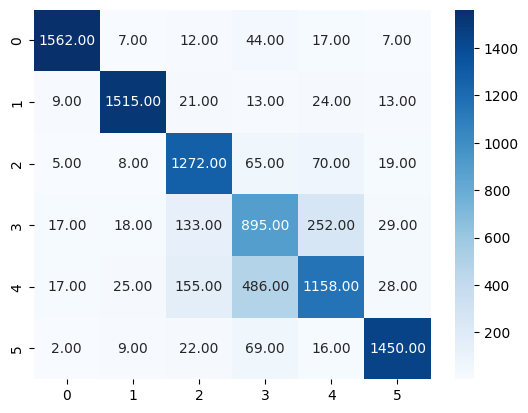

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def metrics_of_model(y_pred, y_test):
    print(classification_report(y_pred, y_test, target_names = df['cyberbullying_type'].unique()))
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues', fmt='.2f')
y_pred = final_rf_classifier.predict(X_test)
metrics_of_model(y_pred, y_test)

In [10]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
y_true = y_test  # Replace ... with your true labels
y_pred = final_rf_classifier.predict(X_test)  # Assuming X is your feature matrix

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8296703296703297
